## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [47]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
bitstamp=pd.read_csv(Path('./Resources/bitstamp.csv'),index_col="Timestamp",parse_dates=True,infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [12]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [48]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(Path('./Resources/coinbase.csv'),index_col="Timestamp",parse_dates=True,infer_datetime_format=True)

In [14]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [49]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# First, look how many NaNs are in the DataFrame
# Create DataFrame with the sum of the number of NaNs and total number of observations across columns for comparison
df_nan_count_bitstamp=pd.concat([bitstamp.isnull().sum(),bitstamp.count()],axis=1)
df_nan_count_bitstamp.columns=['sum_NaN','count']
print(f'BITSTAMP: Comparison of NaNs to the number of observations')
print(pd.DataFrame(df_nan_count_bitstamp))

df_nan_count_coinbase=pd.concat([coinbase.isnull().sum(),coinbase.count()],axis=1)
df_nan_count_coinbase.columns=['sum_NaN','count']
print(f'----------------------')
print(f'COINBASE Comparison of NaNs to the number of observations')
print(pd.DataFrame(df_nan_count_coinbase))

#We can see there are not too many NaNs in comparison to no of observations, so drop all NaNs
bitstamp.dropna(inplace=True)
coinbase.dropna(inplace=True)

BITSTAMP: Comparison of NaNs to the number of observations
                sum_NaN   count
Open                473  129067
High                473  129067
Low                 473  129067
Close                 0  129540
BTC Volume          473  129067
USD Volume          473  129067
Weighted Price      473  129067
----------------------
COINBASE Comparison of NaNs to the number of observations
                sum_NaN   count
Open                218  129322
High                218  129322
Low                 218  129322
Close                 0  129540
BTC Volume          218  129322
USD Volume          218  129322
Weighted Price      218  129322


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [56]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close']=bitstamp['Close'].str.replace('$','',regex=True)
coinbase['Close']=coinbase['Close'].str.replace('$','',regex=True)
print(f'Bitstamp: first five rows')
print(bitstamp.head())
print(f'------------')
print(f'Coinbase: first five rows')
print(coinbase.head())

Bitstamp: first five rows
                         Open      High       Low     Close  BTC Volume  \
Timestamp                                                                 
2018-01-01 00:00:00  13681.04  13681.04  13637.93  13646.48    3.334553   
2018-01-01 00:01:00  13646.48  13658.75  13610.18  13658.75    2.663188   
2018-01-01 00:02:00  13616.93  13616.93  13610.06  13610.22    0.084653   
2018-01-01 00:03:00  13610.27  13639.09  13610.27  13639.09    7.182986   
2018-01-01 00:04:00  13635.35  13636.35  13620.00  13620.00    1.069665   

                       USD Volume  Weighted Price  
Timestamp                                          
2018-01-01 00:00:00  45482.128785    13639.647479  
2018-01-01 00:01:00  36361.390888    13653.332816  
2018-01-01 00:02:00   1152.144036    13610.136247  
2018-01-01 00:03:00  97856.416478    13623.361128  
2018-01-01 00:04:00  14582.660932    13632.923329  
------------
Coinbase: first five rows
                         Open      High      

### Step 3: Convert the data type of the Close column to a `float`.

In [55]:
# Convert the Close data type to a float
bitstamp['Close']=bitstamp['Close'].astype('float')
coinbase['Close']=coinbase['Close'].astype('float')

print('Bitstamp data type')
print(bitstamp.dtypes)
print(f'------------')
print('Coinbase data type')
print(coinbase.dtypes)

Bitstamp data type
Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object
------------
Coinbase data type
Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [58]:
# Review the data for duplicate values, and drop them if necessary
print(f'Number of duplicate values in bitstamp is {bitstamp.duplicated().sum()}.')
print(f'Number of duplicate values in coinbase is {coinbase.duplicated().sum()}.')

Number of duplicate values in bitstamp is 0.
Number of duplicate values in coinbase is 0.


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame
# It has been already accomplished above.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [65]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = pd.DataFrame(bitstamp.loc[:,'Close'])

# Review the first five rows of the DataFrame
print(f'First five rows of the bitstamp_sliced:')
print(bitstamp_sliced.head())

First five rows of the bitstamp_sliced:
                        Close
Timestamp                    
2018-01-01 00:00:00  13646.48
2018-01-01 00:01:00  13658.75
2018-01-01 00:02:00  13610.22
2018-01-01 00:03:00  13639.09
2018-01-01 00:04:00  13620.00


In [67]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = pd.DataFrame(coinbase.loc[:,'Close'])

# Review the first five rows of the DataFrame
print(f'First five rows of the coinbase_sliced:')
print(coinbase_sliced.head())

First five rows of the coinbase_sliced:
                        Close
Timestamp                    
2018-01-01 00:00:00  13608.49
2018-01-01 00:01:00  13601.66
2018-01-01 00:02:00  13580.00
2018-01-01 00:03:00  13550.34
2018-01-01 00:04:00  13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [74]:
# Generate the summary statistics for the bitstamp DataFrame
print(f'The Summary statistics for the Bitstamp DataFrame')
print(bitstamp_sliced.describe())

The Summary statistics for the Bitstamp DataFrame
               Close
count  129067.000000
mean    10459.842453
std      2315.976088
min      5944.000000
25%      8613.370000
50%     10145.950000
75%     11444.810000
max     17234.980000


In [75]:
# Generate the summary statistics for the coinbase DataFrame
print(f'The Summary statistics for the Coinbase DataFrame')
print(coinbase_sliced.describe())

The Summary statistics for the Coinbase DataFrame
               Close
count  129322.000000
mean    10449.140958
std      2317.197419
min      5882.310000
25%      8609.230000
50%     10137.440000
75%     11397.237500
max     17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

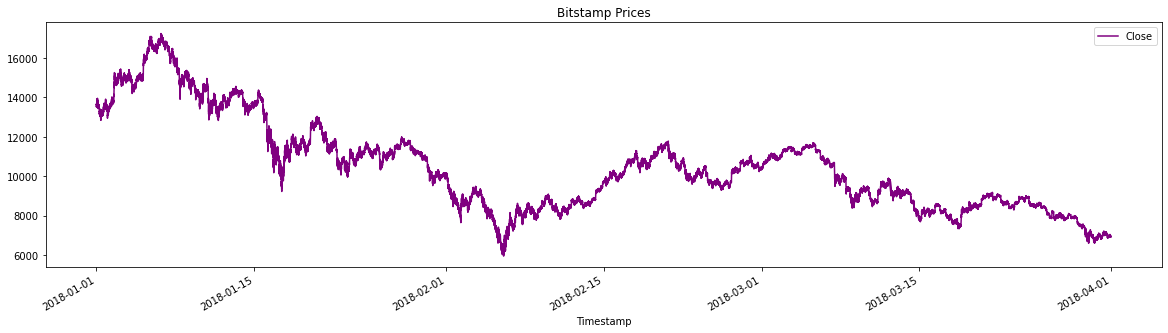

In [89]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(title='Bitstamp Prices',figsize=(20,5),color='purple')

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

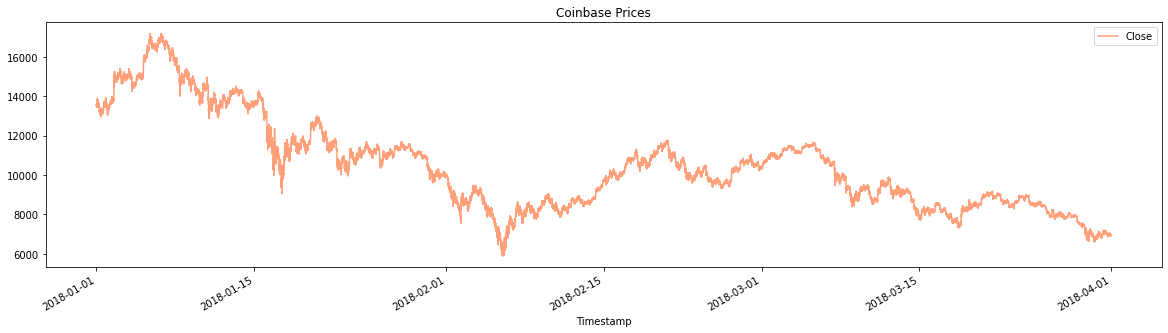

In [87]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(title='Coinbase Prices',figsize=(20,5),color='lightsalmon')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

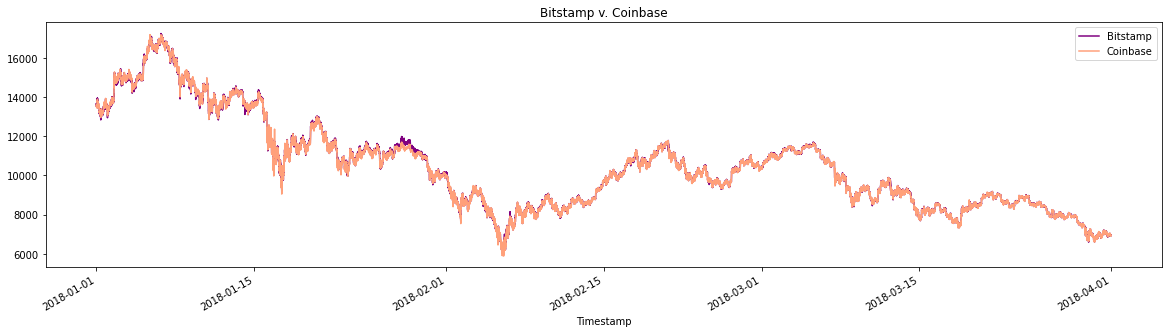

In [90]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].plot(legend=True,title='Bitstamp v. Coinbase',figsize=(20,5),color='purple',label='Bitstamp')
coinbase_sliced['Close'].plot(legend=True,figsize=(20,5),color='lightsalmon',label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase (Jan 2018)'}, xlabel='Timestamp'>

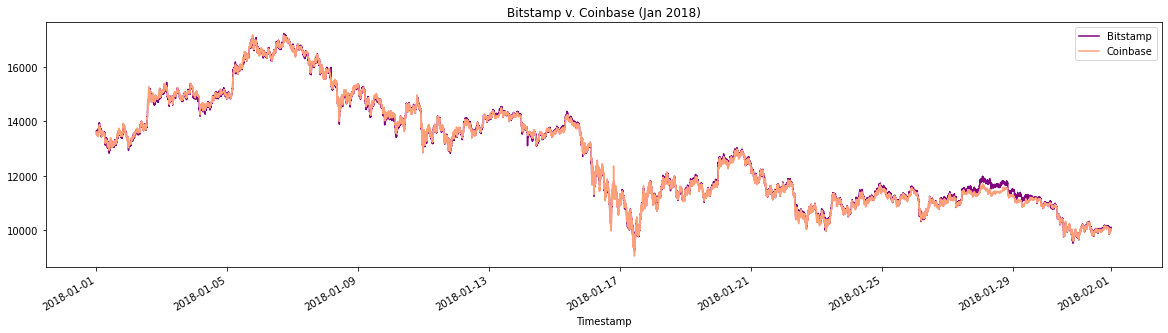

In [94]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True,title='Bitstamp v. Coinbase (Jan 2018)',figsize=(20,5),color='purple',label='Bitstamp')
coinbase_sliced['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True,figsize=(20,5),color='lightsalmon',label='Coinbase')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase (March 2018)'}, xlabel='Timestamp'>

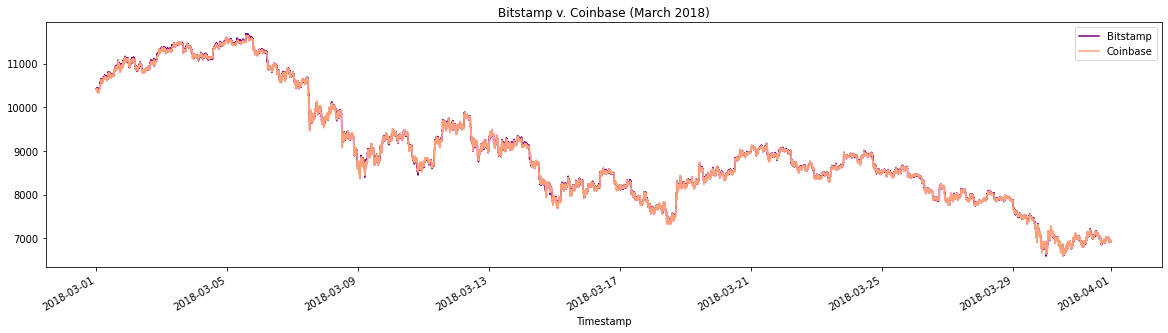

In [96]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True,title='Bitstamp v. Coinbase (March 2018)',figsize=(20,5),color='purple',label='Bitstamp')
coinbase_sliced['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True,figsize=(20,5),color='lightsalmon',label='Coinbase')

In [104]:
# To accurately answer the question about the degree of spread, calculate the average spread for these months:
print(f'The average spread in March was:')
print(pd.Series(bitstamp_sliced['Close'].loc['2018-03-01':'2018-03-31']-coinbase_sliced['Close'].loc['2018-03-01':'2018-03-31']).mean())
print(f'The average spread in January was:')
print(pd.Series(bitstamp_sliced['Close'].loc['2018-01-01':'2018-01-31']-coinbase_sliced['Close'].loc['2018-01-01':'2018-01-31']).mean())


The average spread in March was:
3.9808006683525865
The average spread in January was:
18.025885656520266


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Visually, the spread change seems to be higher in January in comparison to March. The calculations prove this intuition.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'2018-01-01'}, xlabel='Timestamp'>

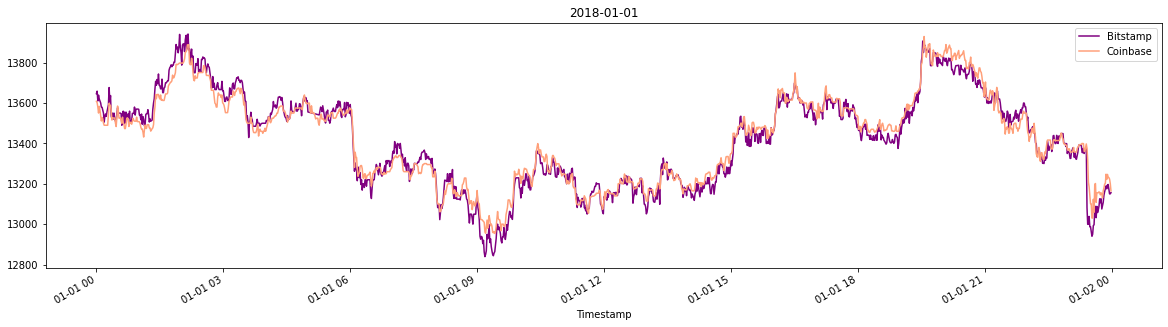

In [106]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-01-01'].plot(title='2018-01-01',legend=True,figsize=(20,5),color='purple',label='Bitstamp')
coinbase_sliced['Close'].loc['2018-01-01'].plot(legend=True,figsize=(20,5),color='lightsalmon',label='Coinbase')


In [109]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-01':'2018-01-01']-bitstamp_sliced['Close'].loc['2018-01-01':'2018-01-01']
# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1421.000000
mean        5.767368
std        46.214511
min      -142.000000
25%       -26.890000
50%         5.480000
75%        36.000000
max       319.990000
Name: Close, dtype: float64

<AxesSubplot:>

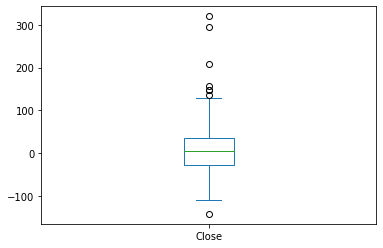

In [110]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'2018-02-01'}, xlabel='Timestamp'>

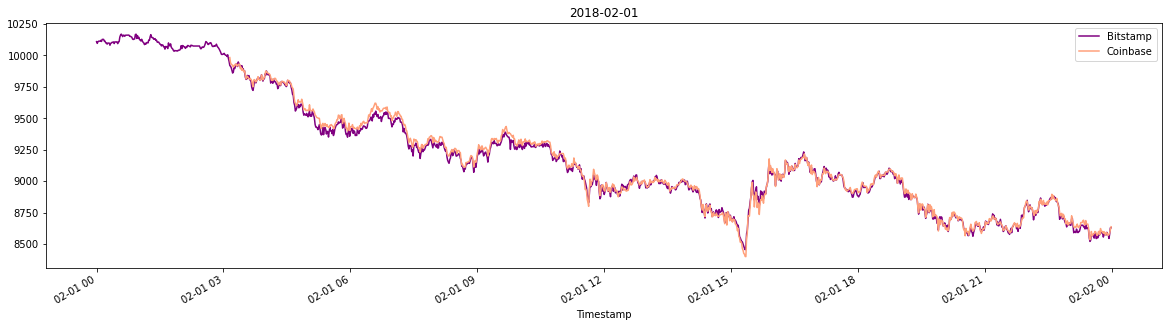

In [115]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-02-01'].plot(title='2018-02-01',legend=True,figsize=(20,5),color='purple',label='Bitstamp')
coinbase_sliced['Close'].loc['2018-02-01'].plot(legend=True,figsize=(20,5),color='lightsalmon',label='Coinbase')


In [116]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-01':'2018-02-01']-bitstamp_sliced['Close'].loc['2018-02-01':'2018-02-01']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1251.000000
mean       13.956163
std        25.420642
min      -115.930000
25%        -0.960000
50%        13.860000
75%        30.795000
max       125.180000
Name: Close, dtype: float64

<AxesSubplot:>

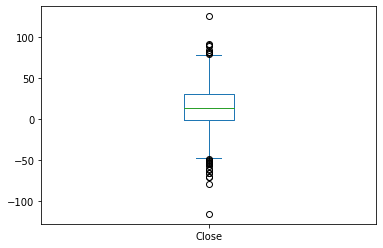

In [117]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'2018-03-31'}, xlabel='Timestamp'>

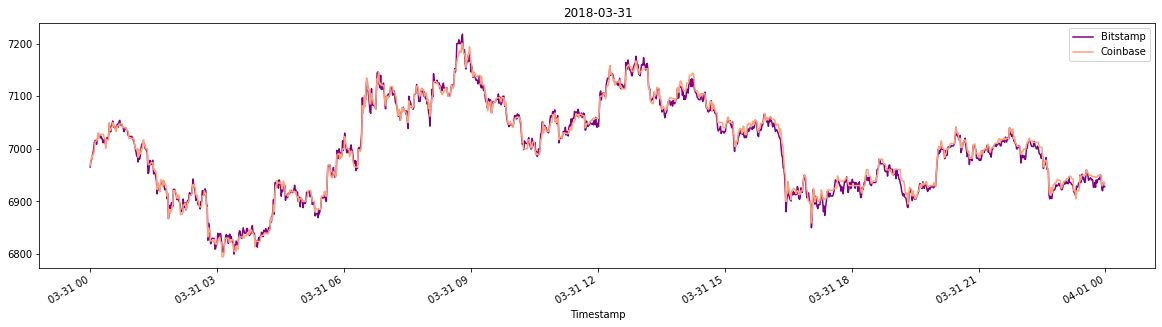

In [118]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced['Close'].loc['2018-03-31'].plot(title='2018-03-31',legend=True,figsize=(20,5),color='purple',label='Bitstamp')
coinbase_sliced['Close'].loc['2018-03-31'].plot(legend=True,figsize=(20,5),color='lightsalmon',label='Coinbase')


In [119]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-03-31':'2018-03-31']-bitstamp_sliced['Close'].loc['2018-03-31':'2018-03-31']


# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1434.000000
mean        2.348675
std         8.109623
min       -35.000000
25%        -2.537500
50%         2.300000
75%         7.627500
max        35.980000
Name: Close, dtype: float64

<AxesSubplot:>

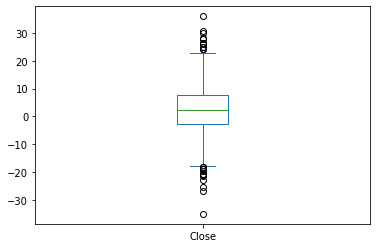

In [120]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [125]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-01':'2018-01-01']-bitstamp_sliced['Close'].loc['2018-01-01':'2018-01-01']
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-01':'2018-02-01']-bitstamp_sliced['Close'].loc['2018-02-01':'2018-02-01']
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-03-31':'2018-03-31']-bitstamp_sliced['Close'].loc['2018-03-31':'2018-03-31']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
print(f'Arbitrage spread early on')
print(arbitrage_spread_early[arbitrage_spread_early>0].describe())
print(f'--------------------------')
print(f'Arbitrage spread in the middle')
print(arbitrage_spread_middle[arbitrage_spread_middle>0].describe())
print(f'--------------------------')
print(f'Arbitrage spread later on')
print(arbitrage_spread_late[arbitrage_spread_late>0].describe())

Arbitrage spread early on
count    782.000000
mean      38.672634
std       31.451187
min        0.010000
25%       15.950000
50%       32.610000
75%       53.627500
max      319.990000
Name: Close, dtype: float64
--------------------------
Arbitrage spread in the middle
count    911.000000
mean      25.263568
std       17.906485
min        0.040000
25%       10.465000
50%       22.060000
75%       36.220000
max      125.180000
Name: Close, dtype: float64
--------------------------
Arbitrage spread later on
count    913.000000
mean       7.013461
std        5.438677
min        0.010000
25%        2.680000
50%        6.010000
75%       10.000000
max       35.980000
Name: Close, dtype: float64


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [131]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0]/bitstamp_sliced['Close'].loc['2018-01-01':'2018-01-01']
spread_return_middle=arbitrage_spread_middle[arbitrage_spread_middle>0]/bitstamp_sliced['Close'].loc['2018-02-01':'2018-02-01']
spread_return_late=arbitrage_spread_late[arbitrage_spread_late>0]/bitstamp_sliced['Close'].loc['2018-03-31':'2018-03-31']
# Review the spread return DataFrame
print(f'The Spread return early on')
print(spread_return_early)
print(f'------------------------------')
print(f'The Spread return in the middle')
print(spread_return_middle)
print(f'------------------------------')
print(f'The Spread return later on')
print(spread_return_late)

The Spread return early on
Timestamp
2018-01-01 00:00:00         NaN
2018-01-01 00:01:00         NaN
2018-01-01 00:02:00         NaN
2018-01-01 00:03:00         NaN
2018-01-01 00:04:00         NaN
                         ...   
2018-01-01 23:55:00    0.002673
2018-01-01 23:56:00    0.004239
2018-01-01 23:57:00    0.005579
2018-01-01 23:58:00    0.003959
2018-01-01 23:59:00    0.000677
Name: Close, Length: 1421, dtype: float64
------------------------------
The Spread return in the middle
Timestamp
2018-02-01 00:00:00         NaN
2018-02-01 00:01:00         NaN
2018-02-01 00:02:00         NaN
2018-02-01 00:03:00         NaN
2018-02-01 00:04:00         NaN
                         ...   
2018-02-01 23:55:00         NaN
2018-02-01 23:56:00    0.003682
2018-02-01 23:57:00    0.001097
2018-02-01 23:58:00         NaN
2018-02-01 23:59:00    0.000912
Name: Close, Length: 1437, dtype: float64
------------------------------
The Spread return later on
Timestamp
2018-03-31 00:00:00    0.000355
20

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [132]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]
profitable_trades_late = spread_return_late[spread_return_late>0.01]

# Review the first five profitable trades
print('First five profitable trades early on')
print(profitable_trades_early.head())
print(f'-----------------------------------------')
print('First five profitable trades in the middle')
print(profitable_trades_middle.head())
print(f'-----------------------------------------')
print('First five profitable trades later on')
print(profitable_trades_late.head())

First five profitable trades early on
Timestamp
2018-01-01 09:10:00    0.011455
2018-01-01 23:25:00    0.022465
2018-01-01 23:26:00    0.024616
2018-01-01 23:27:00    0.015948
2018-01-01 23:28:00    0.011261
Name: Close, dtype: float64
-----------------------------------------
First five profitable trades in the middle
Timestamp
2018-02-01 09:47:00    0.013529
Name: Close, dtype: float64
-----------------------------------------
First five profitable trades later on
Series([], Name: Close, dtype: float64)


#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [134]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
print('Summary statistics for the profitable trades early on')
print(profitable_trades_early.describe())
print(f'-----------------------------------------')
print('Summary statistics for the profitable trades in the middle')
print(profitable_trades_middle.describe())
print(f'-----------------------------------------')
print('Summary statistics for the profitable trades later on')
print(profitable_trades_late.describe())

Summary statistics for the profitable trades early on
count    7.000000
mean     0.015453
std      0.005833
min      0.010427
25%      0.011358
50%      0.012001
75%      0.019207
max      0.024616
Name: Close, dtype: float64
-----------------------------------------
Summary statistics for the profitable trades in the middle
count    1.000000
mean     0.013529
std           NaN
min      0.013529
25%      0.013529
50%      0.013529
75%      0.013529
max      0.013529
Name: Close, dtype: float64
-----------------------------------------
Summary statistics for the profitable trades later on
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [135]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early*bitstamp_sliced['Close'].loc['2018-01-01':'2018-01-01']
profit_middle = profitable_trades_middle*bitstamp_sliced['Close'].loc['2018-02-01':'2018-02-01']
profit_late = profitable_trades_late*bitstamp_sliced['Close'].loc['2018-03-31':'2018-03-31']
# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
print('Profit per trade early on')
print(profit_per_trade_early)
print(f'---------------------')
print('Profit per trade in the middle')
print(profit_per_trade_middle)
print(f'---------------------')
print('Profit per trade later on')
print(profit_per_trade_late)

Profit per trade early on
Timestamp
2018-01-01 09:10:00    147.33
2018-01-01 23:25:00    293.89
2018-01-01 23:26:00    319.99
2018-01-01 23:27:00    207.33
2018-01-01 23:28:00    146.82
2018-01-01 23:29:00    155.86
2018-01-01 23:31:00    135.18
Name: Close, dtype: float64
---------------------
Profit per trade in the middle
Timestamp
2018-02-01 09:47:00    125.18
Name: Close, dtype: float64
---------------------
Profit per trade later on
Series([], Name: Close, dtype: float64)


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [136]:
# Generate the summary statistics for the early profit per trade DataFrame
print('Summary statistics for the profit per trade early on')
print(profit_per_trade_early.describe())
print(f'---------------------')
print('Summary statistics for the profit per trade in the middle')
print(profit_per_trade_middle.describe())
print(f'---------------------')
print('Summary statistics for the profit per trade later on')
print(profit_per_trade_late.describe())

Summary statistics for the profit per trade early on
count      7.000000
mean     200.914286
std       76.390469
min      135.180000
25%      147.075000
50%      155.860000
75%      250.610000
max      319.990000
Name: Close, dtype: float64
---------------------
Summary statistics for the profit per trade in the middle
count      1.00
mean     125.18
std         NaN
min      125.18
25%      125.18
50%      125.18
75%      125.18
max      125.18
Name: Close, dtype: float64
---------------------
Summary statistics for the profit per trade later on
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


Text(0.5, 1.0, 'Profit per trade late')

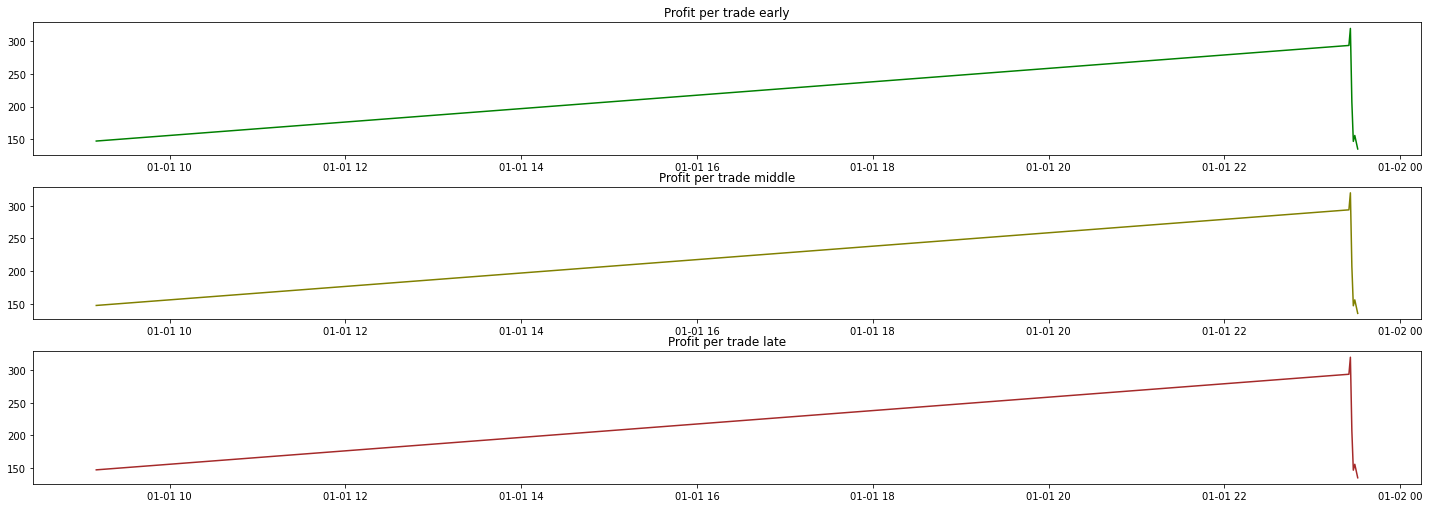

In [253]:
# Plot the results for the early profit per trade DataFrame
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots(3, 1, figsize=(20,7))
fig.tight_layout()

ax[0].plot(profit_per_trade_early,color='green')
ax[0].set_title("Profit per trade early")
ax[1].plot(profit_per_trade_early,color='olive')
ax[1].set_title("Profit per trade middle")
ax[2].plot(profit_per_trade_early,color='brown')
ax[2].set_title("Profit per trade late")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [259]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
print(f'The sum of potential profits per trade early on is {round(profit_per_trade_early.sum(),2)}')
print(f'The sum of potential profits per trade in the middle of the time period is {round(profit_per_trade_middle.sum(),2)}')
print(f'The sum of potential profits per trade later on on is {round(profit_per_trade_late.sum(),2)}')

The sum of potential profits per trade early on is 1406.4
The sum of potential profits per trade in the middle of the time period is 125.18
The sum of potential profits per trade later on on is 0.0


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [147]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()

Text(0.5, 1.0, 'Cumulative sum of profits later on')

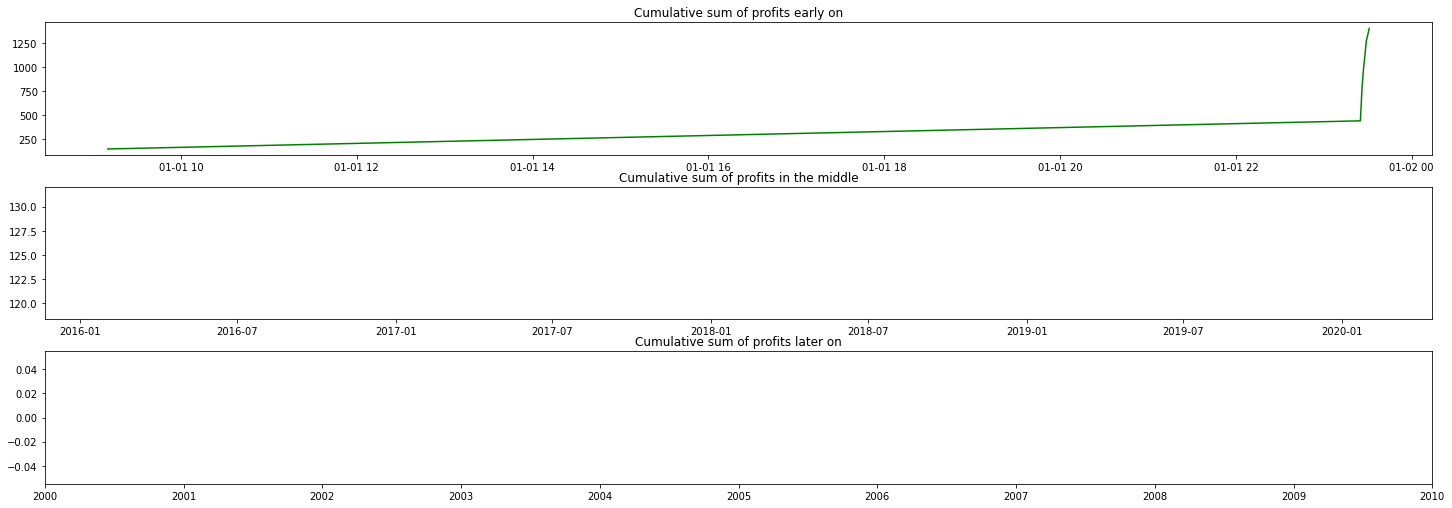

In [260]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
fig, ax = plt.subplots(3, 1, figsize=(20,7))
fig.tight_layout()

ax[0].plot(cumulative_profit_early,color='green')
ax[0].set_title("Cumulative sum of profits early on")
ax[1].plot(cumulative_profit_middle,color='olive')
ax[1].set_title("Cumulative sum of profits in the middle")
ax[2].plot(cumulative_profit_late,color='brown')
ax[2].set_title("Cumulative sum of profits later on")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE